In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
import os

DATA_PATH = "data"

print("Inside data folder:")
print(os.listdir(DATA_PATH))


Inside data folder:
['aggregated', 'map', 'top']


In [3]:
import json
import pandas as pd

agg_trans_path = os.path.join(
    DATA_PATH,
    "aggregated",
    "transaction",
    "country",
    "india",
    "state"
)

states = os.listdir(agg_trans_path)

agg_trans_data = []

for state in states:
    state_path = os.path.join(agg_trans_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                data = json.load(f)
                
                for txn in data["data"]["transactionData"]:
                    agg_trans_data.append({
                        "State": state,
                        "Year": int(year),
                        "Quarter": int(file.replace(".json","")),
                        "Transaction_Type": txn["name"],
                        "Transaction_Count": txn["paymentInstruments"][0]["count"],
                        "Transaction_Amount": txn["paymentInstruments"][0]["amount"]
                    })

df_agg_transaction = pd.DataFrame(agg_trans_data)
df_agg_transaction.head()


,State,Year,Quarter,Transaction_Type,Transaction_Count,Transaction_Amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05


In [4]:
df_agg_transaction["State"] = (
    df_agg_transaction["State"]
    .str.replace("-", " ")
    .str.replace("&", "and")
    .str.title()
)

df_agg_transaction.head()


,State,Year,Quarter,Transaction_Type,Transaction_Count,Transaction_Amount
0,Andaman And Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,Andaman And Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,Andaman And Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05
3,Andaman And Nicobar Islands,2018,1,Financial Services,33,1.060142e+04
4,Andaman And Nicobar Islands,2018,1,Others,256,1.846899e+05


In [5]:
df_agg_transaction.describe()


,Year,Quarter,Transaction_Count,Transaction_Amount
count,5034.000000,5034.000000,5.034000e+03,5.034000e+03
mean,2021.002582,2.500795,4.673902e+07,6.863772e+10
std,1.999849,1.118145,1.690968e+08,2.685200e+11
min,2018.000000,1.000000,2.000000e+00,3.439721e+01
25%,2019.000000,2.000000,5.808950e+04,3.993888e+07
50%,2021.000000,3.000000,5.158310e+05,4.394139e+08
75%,2023.000000,4.000000,1.166629e+07,1.102822e+10
max,2024.000000,4.000000,2.393918e+09,3.095666e+12


In [6]:
txn_type_summary = (
    df_agg_transaction
    .groupby("Transaction_Type")[["Transaction_Count","Transaction_Amount"]]
    .sum()
    .sort_values(by="Transaction_Amount", ascending=False)
)

txn_type_summary


,Transaction_Count,Transaction_Amount
Transaction_Type,,
Peer-to-peer payments,85032446653,2.665274e+14
Merchant payments,130238755487,6.533988e+13
Recharge & bill payments,19596755603,1.333876e+13
Others,262050188,1.742807e+11
Financial Services,154208943,1.420188e+11


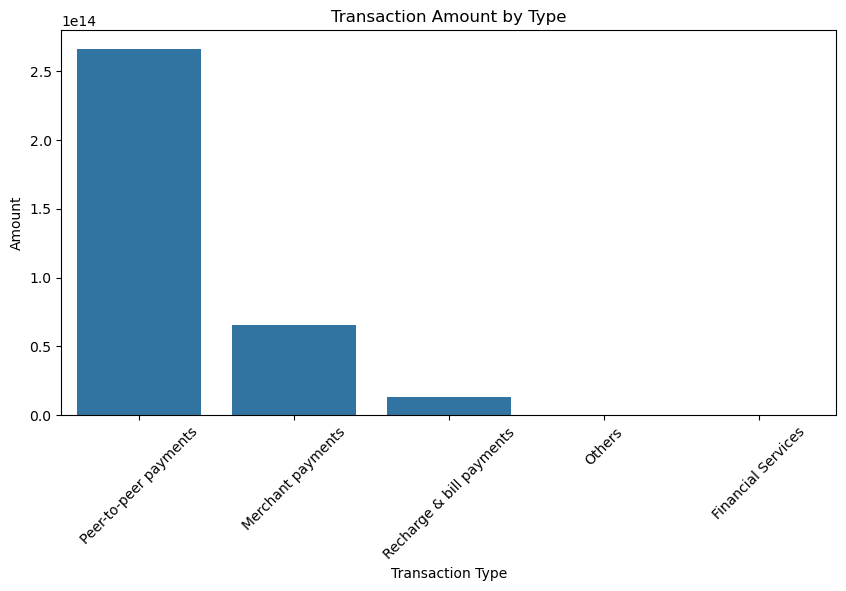

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(
    x=txn_type_summary.index,
    y=txn_type_summary["Transaction_Amount"]
)
plt.xticks(rotation=45)
plt.title("Transaction Amount by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Amount")
plt.show()


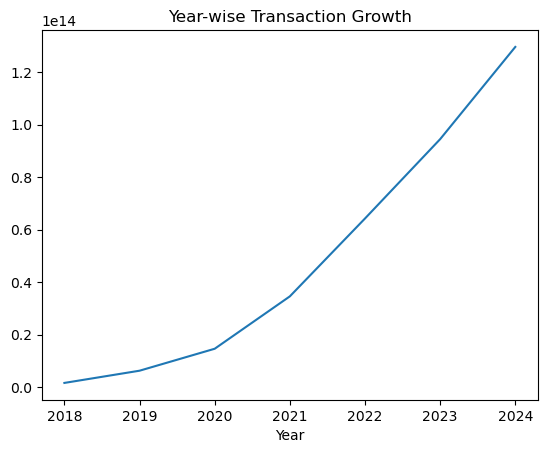

In [8]:
yearly_trend = (
    df_agg_transaction
    .groupby("Year")["Transaction_Amount"]
    .sum()
)

yearly_trend.plot(kind="line", title="Year-wise Transaction Growth")
plt.show()


In [9]:
df_agg_transaction.to_csv("data/clean_aggregated_transaction.csv", index=False)


In [10]:
import json
import pandas as pd
import os

agg_user_path = os.path.join(
    DATA_PATH,
    "aggregated",
    "user",
    "country",
    "india",
    "state"
)

states = os.listdir(agg_user_path)

agg_user_data = []

for state in states:
    state_path = os.path.join(agg_user_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                data = json.load(f)

                for user_data in data["data"]["usersByDevice"]:
                    agg_user_data.append({
                        "State": state,
                        "Year": int(year),
                        "Quarter": int(file.replace(".json","")),
                        "Device_Brand": user_data["brand"],
                        "User_Count": user_data["count"],
                        "User_Percentage": user_data["percentage"]
                    })

df_agg_user = pd.DataFrame(agg_user_data)
df_agg_user.head()


TypeError: 'NoneType' object is not iterable

In [11]:
agg_user_data = []

for state in states:
    state_path = os.path.join(agg_user_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                data = json.load(f)

                users = data["data"].get("usersByDevice")

                # 🔴 IMPORTANT FIX
                if users is None:
                    continue

                for user_data in users:
                    agg_user_data.append({
                        "State": state,
                        "Year": int(year),
                        "Quarter": int(file.replace(".json","")),
                        "Device_Brand": user_data["brand"],
                        "User_Count": user_data["count"],
                        "User_Percentage": user_data["percentage"]
                    })

df_agg_user = pd.DataFrame(agg_user_data)
df_agg_user.head()



,State,Year,Quarter,Device_Brand,User_Count,User_Percentage
0,andaman-&-nicobar-islands,2018,1,Xiaomi,1665,0.247033
1,andaman-&-nicobar-islands,2018,1,Samsung,1445,0.214392
2,andaman-&-nicobar-islands,2018,1,Vivo,982,0.145697
3,andaman-&-nicobar-islands,2018,1,Oppo,501,0.074332
4,andaman-&-nicobar-islands,2018,1,OnePlus,332,0.049258


In [12]:
df_agg_user.isnull().sum()


State              0
Year               0
Quarter            0
Device_Brand       0
User_Count         0
User_Percentage    0
dtype: int64

In [14]:
df_agg_user["State"] = (
    df_agg_user["State"]
    .str.replace("-", " ")
    .str.replace("&", "and")
    .str.title()
)

In [15]:
map_trans_path = os.path.join(
    DATA_PATH,
    "map",
    "transaction",
    "hover",
    "country",
    "india",
    "state"
)

states = os.listdir(map_trans_path)

map_transaction_data = []

for state in states:
    state_path = os.path.join(map_trans_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                data = json.load(f)

                for district, values in data["data"]["hoverDataList"].items():
                    map_transaction_data.append({
                        "State": state,
                        "Year": int(year),
                        "Quarter": int(file.replace(".json","")),
                        "District": district,
                        "Transaction_Count": values["metric"][0]["count"],
                        "Transaction_Amount": values["metric"][0]["amount"]
                    })

df_map_transaction = pd.DataFrame(map_transaction_data)
df_map_transaction.head()


AttributeError: 'list' object has no attribute 'items'

In [16]:
map_transaction_data = []

for state in states:
    state_path = os.path.join(map_trans_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                data = json.load(f)

                hover_list = data["data"].get("hoverDataList")

                # Safety check
                if hover_list is None:
                    continue

                for item in hover_list:
                    map_transaction_data.append({
                        "State": state,
                        "Year": int(year),
                        "Quarter": int(file.replace(".json","")),
                        "District": item["name"],
                        "Transaction_Count": item["metric"][0]["count"],
                        "Transaction_Amount": item["metric"][0]["amount"]
                    })

df_map_transaction = pd.DataFrame(map_transaction_data)
df_map_transaction.head()


,State,Year,Quarter,District,Transaction_Count,Transaction_Amount
0,andaman-&-nicobar-islands,2018,1,north and middle andaman district,442,9.316631e+05
1,andaman-&-nicobar-islands,2018,1,south andaman district,5688,1.256025e+07
2,andaman-&-nicobar-islands,2018,1,nicobars district,528,1.139849e+06
3,andaman-&-nicobar-islands,2018,2,north and middle andaman district,825,1.317863e+06
4,andaman-&-nicobar-islands,2018,2,south andaman district,9395,2.394824e+07


In [17]:
df_map_transaction["State"] = (
    df_map_transaction["State"]
    .str.replace("-", " ")
    .str.replace("&", "and")
    .str.title()
)

df_map_transaction["District"] = df_map_transaction["District"].str.title()


In [18]:
df_map_transaction.shape
df_map_transaction.isnull().sum()


State                 0
Year                  0
Quarter               0
District              0
Transaction_Count     0
Transaction_Amount    0
dtype: int64

In [19]:
df_map_transaction.groupby("District")["Transaction_Amount"]\
    .sum().sort_values(ascending=False).head(10)


District
Bengaluru Urban District       1.993784e+13
Hyderabad District             1.190694e+13
Pune District                  9.730218e+12
Jaipur District                7.854092e+12
Rangareddy District            7.155140e+12
Medchal Malkajgiri District    5.758878e+12
Visakhapatnam District         4.198568e+12
Guntur District                3.174527e+12
Krishna District               3.142856e+12
Patna District                 3.110762e+12
Name: Transaction_Amount, dtype: float64

In [20]:
top_state_path = os.path.join(
    DATA_PATH,
    "top",
    "transaction",
    "country",
    "india",
    "state"
)

top_state_data = []

for state in os.listdir(top_state_path):
    state_path = os.path.join(top_state_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                data = json.load(f)

                for item in data["data"]["states"]:
                    top_state_data.append({
                        "State": item["name"],
                        "Year": int(year),
                        "Quarter": int(file.replace(".json","")),
                        "Transaction_Count": item["metric"]["count"],
                        "Transaction_Amount": item["metric"]["amount"]
                    })

df_top_state = pd.DataFrame(top_state_data)
df_top_state.head()



TypeError: 'NoneType' object is not iterable

In [31]:
top_state_data = []

for year in os.listdir(top_state_path):
    year_path = os.path.join(top_state_path, year)

    # ✅ safety: ensure it's a directory
    if not os.path.isdir(year_path):
        continue

    for file in os.listdir(year_path):
        # ✅ process only JSON files
        if not file.endswith(".json"):
            continue

        file_path = os.path.join(year_path, file)

        with open(file_path, "r") as f:
            data = json.load(f)

            states_list = data["data"].get("states")

            if states_list is None:
                continue

            for item in states_list:
                top_state_data.append({
                    "State": item["name"],
                    "Year": int(year),
                    "Quarter": int(file.replace(".json", "")),
                    "Transaction_Count": item["metric"]["count"],
                    "Transaction_Amount": item["metric"]["amount"]
                })

df_top_state = pd.DataFrame(top_state_data)
df_top_state.head()

""


In [30]:
df_top_state.shape
df_top_state.isnull().sum()


Series([], dtype: float64)

In [32]:
import os

base_path = os.path.join(
    DATA_PATH,
    "top",
    "transaction",
    "country",
    "india"
)

print("Contents of india folder:")
print(os.listdir(base_path))


Contents of india folder:
['2018', '2019', '2020', '2021', '2022', '2023', '2024', 'state']


In [35]:
top_state_data = []

for year in os.listdir(base_path):
    year_path = os.path.join(base_path, year)

    if not year.isdigit():
        continue

    for file in os.listdir(year_path):
        if not file.endswith(".json"):
            continue

        file_path = os.path.join(year_path, file)

        with open(file_path, "r") as f:
            data = json.load(f)

            states_list = data.get("data", {}).get("states")

            if states_list is None:
                continue

            for item in states_list:
                top_state_data.append({
                    "State": item.get("entityName"),
                    "Year": int(year),
                    "Quarter": int(file.replace(".json", "")),
                    "Transaction_Count": item["metric"]["count"],
                    "Transaction_Amount": item["metric"]["amount"]
                })

df_top_state = pd.DataFrame(top_state_data)
df_top_state.head()


,State,Year,Quarter,Transaction_Count,Transaction_Amount
0,maharashtra,2018,1,16387034,2.171161e+10
1,uttar pradesh,2018,1,12537805,1.393997e+10
2,karnataka,2018,1,12016899,1.921790e+10
3,west bengal,2018,1,11710225,1.062598e+10
4,andhra pradesh,2018,1,9039585,1.199628e+10


In [36]:
df_top_state.shape
df_top_state.isnull().sum()


State                 0
Year                  0
Quarter               0
Transaction_Count     0
Transaction_Amount    0
dtype: int64

In [37]:
top_states = (
    df_top_state
    .groupby("State")["Transaction_Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_states


State
telangana         4.165596e+13
karnataka         4.067872e+13
maharashtra       4.037420e+13
andhra pradesh    3.466908e+13
uttar pradesh     2.688521e+13
rajasthan         2.628129e+13
madhya pradesh    1.912528e+13
bihar             1.693849e+13
west bengal       1.089064e+13
odisha            9.047553e+12
Name: Transaction_Amount, dtype: float64

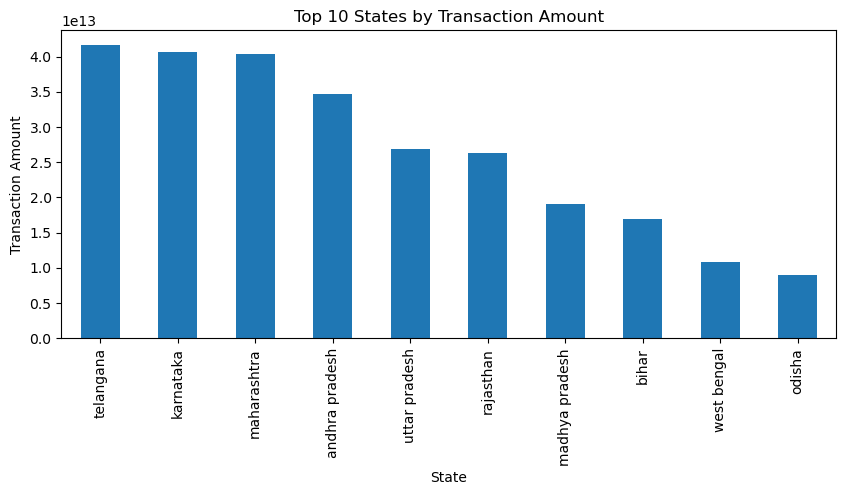

In [38]:
import matplotlib.pyplot as plt

top_states.plot(
    kind="bar",
    figsize=(10,4),
    title="Top 10 States by Transaction Amount"
)
plt.ylabel("Transaction Amount")
plt.show()


In [39]:
df_top_state.to_csv("data/clean_top_states.csv", index=False)


In [40]:
top_district_data = []

for year in os.listdir(base_path):
    year_path = os.path.join(base_path, year)

    if not year.isdigit():
        continue

    for file in os.listdir(year_path):
        if not file.endswith(".json"):
            continue

        file_path = os.path.join(year_path, file)

        with open(file_path, "r") as f:
            data = json.load(f)

            districts_list = data.get("data", {}).get("districts")

            if districts_list is None:
                continue

            for item in districts_list:
                top_district_data.append({
                    "District": item.get("entityName"),
                    "Year": int(year),
                    "Quarter": int(file.replace(".json", "")),
                    "Transaction_Count": item["metric"]["count"],
                    "Transaction_Amount": item["metric"]["amount"]
                })

df_top_district = pd.DataFrame(top_district_data)
df_top_district.head()


,District,Year,Quarter,Transaction_Count,Transaction_Amount
0,bengaluru urban,2018,1,8306513,1.416275e+10
1,pune,2018,1,3842929,5.378982e+09
2,central delhi,2018,1,2997714,4.312145e+09
3,mumbai,2018,1,2671029,3.923117e+09
4,chennai,2018,1,2656230,4.281138e+09


In [41]:
df_top_district.shape
df_top_district.isnull().sum()


District              0
Year                  0
Quarter               0
Transaction_Count     0
Transaction_Amount    0
dtype: int64

In [42]:
top_districts = (
    df_top_district
    .groupby("District")["Transaction_Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_districts


District
bengaluru urban       1.993784e+13
hyderabad             1.190694e+13
pune                  9.730218e+12
jaipur                7.854092e+12
rangareddy            7.141838e+12
medchal malkajgiri    5.263291e+12
visakhapatnam         2.665652e+12
central delhi         1.896758e+12
gurugram              1.649017e+12
khordha               1.276154e+12
Name: Transaction_Amount, dtype: float64

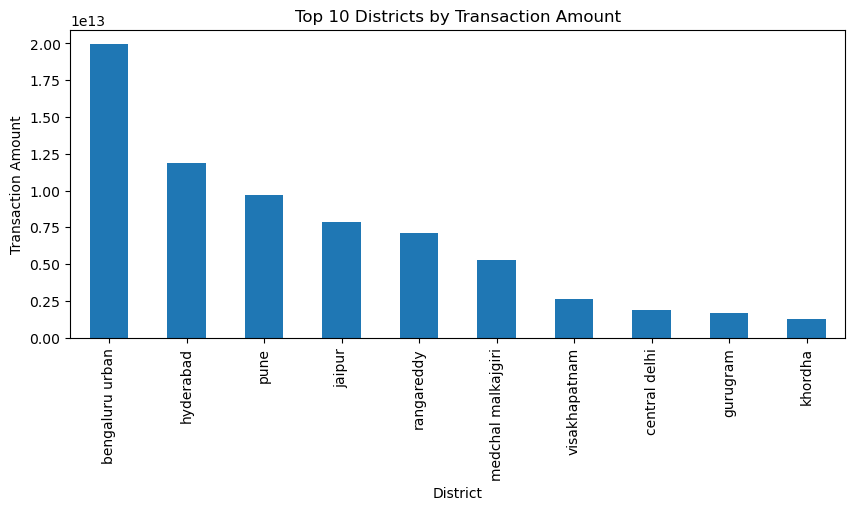

In [43]:
top_districts.plot(
    kind="bar",
    figsize=(10,4),
    title="Top 10 Districts by Transaction Amount"
)
plt.ylabel("Transaction Amount")
plt.show()


In [44]:
df_top_district.to_csv("data/clean_top_districts.csv", index=False)


In [45]:
top_pincode_data = []

for year in os.listdir(base_path):
    year_path = os.path.join(base_path, year)

    if not year.isdigit():
        continue

    for file in os.listdir(year_path):
        if not file.endswith(".json"):
            continue

        file_path = os.path.join(year_path, file)

        with open(file_path, "r") as f:
            data = json.load(f)

            pincodes_list = data.get("data", {}).get("pincodes")

            if pincodes_list is None:
                continue

            for item in pincodes_list:
                top_pincode_data.append({
                    "Pincode": item.get("entityName"),
                    "Year": int(year),
                    "Quarter": int(file.replace(".json", "")),
                    "Transaction_Count": item["metric"]["count"],
                    "Transaction_Amount": item["metric"]["amount"]
                })

df_top_pincode = pd.DataFrame(top_pincode_data)
df_top_pincode.head()


,Pincode,Year,Quarter,Transaction_Count,Transaction_Amount
0,560001,2018,1,2917356,4.684262e+09
1,110006,2018,1,2636324,3.714139e+09
2,400008,2018,1,2227885,3.105209e+09
3,600003,2018,1,2010196,2.997847e+09
4,731101,2018,1,1764956,2.366771e+09


In [46]:
df_top_pincode.shape
df_top_pincode.isnull().sum()


Pincode               0
Year                  0
Quarter               0
Transaction_Count     0
Transaction_Amount    0
dtype: int64

In [47]:
top_pincodes = (
    df_top_pincode
    .groupby("Pincode")["Transaction_Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_pincodes


Pincode
500001    2.838392e+12
500034    2.777747e+12
560001    2.092538e+12
411004    1.748158e+12
110006    1.656010e+12
302016    1.480773e+12
800001    1.260510e+12
462008    8.925471e+11
751001    8.850927e+11
500072    7.294876e+11
Name: Transaction_Amount, dtype: float64

In [48]:
df_top_pincode.to_csv("data/clean_top_pincodes.csv", index=False)


In [49]:
import sqlite3

# Create / connect to database
conn = sqlite3.connect("phonepe_transaction_insights.db")

print("Database connected successfully")


Database connected successfully


NameError: name 'phonepe_transaction_insights' is not defined

In [51]:
df_agg_transaction.to_sql(
    "aggregated_transaction",
    conn,
    if_exists="replace",
    index=False
)

df_agg_user.to_sql(
    "aggregated_user",
    conn,
    if_exists="replace",
    index=False
)

df_map_transaction.to_sql(
    "map_transaction",
    conn,
    if_exists="replace",
    index=False
)

df_top_state.to_sql(
    "top_state",
    conn,
    if_exists="replace",
    index=False
)

df_top_district.to_sql(
    "top_district",
    conn,
    if_exists="replace",
    index=False
)

df_top_pincode.to_sql(
    "top_pincode",
    conn,
    if_exists="replace",
    index=False
)

print("All tables successfully saved to SQL database")


All tables successfully saved to SQL database


In [52]:
cursor = conn.cursor()

cursor.execute("""
SELECT name FROM sqlite_master 
WHERE type='table';
""")

cursor.fetchall()


[('aggregated_transaction',),
 ('aggregated_user',),
 ('map_transaction',),
 ('top_state',),
 ('top_district',),
 ('top_pincode',)]

In [53]:
query = """
SELECT State, SUM(Transaction_Amount) AS Total_Amount
FROM top_state
GROUP BY State
ORDER BY Total_Amount DESC
LIMIT 5;
"""

import pandas as pd
pd.read_sql(query, conn)


,State,Total_Amount
0,telangana,4.165596e+13
1,karnataka,4.067872e+13
2,maharashtra,4.037420e+13
3,andhra pradesh,3.466908e+13
4,uttar pradesh,2.688521e+13


In [54]:
query = """
SELECT Year, SUM(Transaction_Amount) AS Total_Amount
FROM aggregated_transaction
GROUP BY Year
ORDER BY Year;
"""

pd.read_sql(query, conn)


,Year,Total_Amount
0,2018,1.623045e+12
1,2019,6.276688e+12
2,2020,1.464116e+13
3,2021,3.459870e+13
4,2022,6.426633e+13
5,2023,9.449181e+13
6,2024,1.296246e+14


In [55]:
import streamlit as st
import sqlite3
import pandas as pd
import plotly.express as px

# ---------------- DATABASE CONNECTION ----------------
conn = sqlite3.connect("../phonepe_transaction_insights.db")

# ---------------- PAGE CONFIG ----------------
st.set_page_config(
    page_title="PhonePe Transaction Insights",
    layout="wide"
)

st.title("📊 PhonePe Transaction Insights Dashboard")
st.markdown("Interactive analysis of PhonePe transactions across India")

# ---------------- LOAD DATA ----------------
df_agg_transaction = pd.read_sql("SELECT * FROM aggregated_transaction", conn)
df_agg_user = pd.read_sql("SELECT * FROM aggregated_user", conn)
df_map_transaction = pd.read_sql("SELECT * FROM map_transaction", conn)
df_top_state = pd.read_sql("SELECT * FROM top_state", conn)
df_top_district = pd.read_sql("SELECT * FROM top_district", conn)
df_top_pincode = pd.read_sql("SELECT * FROM top_pincode", conn)

# ---------------- SIDEBAR FILTERS ----------------
st.sidebar.header("🔍 Filters")

year = st.sidebar.selectbox(
    "Select Year",
    sorted(df_agg_transaction["Year"].unique())
)

quarter = st.sidebar.selectbox(
    "Select Quarter",
    sorted(df_agg_transaction["Quarter"].unique())
)

# ---------------- KPI SECTION ----------------
filtered_txn = df_agg_transaction[
    (df_agg_transaction["Year"] == year) &
    (df_agg_transaction["Quarter"] == quarter)
]

col1, col2, col3 = st.columns(3)

col1.metric(
    "Total Transaction Amount",
    f"₹ {filtered_txn['Transaction_Amount'].sum():,.0f}"
)

col2.metric(
    "Total Transaction Count",
    f"{filtered_txn['Transaction_Count'].sum():,}"
)

col3.metric(
    "Total States",
    filtered_txn["State"].nunique()
)

# ---------------- TRANSACTION TYPE BAR ----------------
st.subheader("💳 Transaction Amount by Type")

txn_type = (
    filtered_txn
    .groupby("Transaction_Type")["Transaction_Amount"]
    .sum()
    .reset_index()
)

fig1 = px.bar(
    txn_type,
    x="Transaction_Type",
    y="Transaction_Amount",
    title="Transaction Amount by Type"
)

st.plotly_chart(fig1, use_container_width=True)

# ---------------- TOP STATES ----------------
st.subheader("🏆 Top 10 States by Transaction Amount")

top_states = (
    df_top_state
    .groupby("State")["Transaction_Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig2 = px.bar(
    top_states,
    x="State",
    y="Transaction_Amount",
    title="Top 10 States"
)

st.plotly_chart(fig2, use_container_width=True)

# ---------------- TOP DISTRICTS ----------------
st.subheader("📍 Top 10 Districts")

top_districts = (
    df_top_district
    .groupby("District")["Transaction_Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig3 = px.bar(
    top_districts,
    x="District",
    y="Transaction_Amount",
    title="Top 10 Districts"
)

st.plotly_chart(fig3, use_container_width=True)

# ---------------- USER GROWTH ----------------
st.subheader("👥 Year-wise User Growth")

user_growth = (
    df_agg_user
    .groupby("Year")["User_Count"]
    .sum()
    .reset_index()
)

fig4 = px.line(
    user_growth,
    x="Year",
    y="User_Count",
    title="PhonePe User Growth Over Years"
)

st.plotly_chart(fig4, use_container_width=True)

# ---------------- FOOTER ----------------
st.markdown("---")
st.markdown("📌 **Project:** PhonePe Transaction Insights")
st.markdown("🛠 **Tech Stack:** Python | SQL | Streamlit | Data Analytics")


2025-12-14 14:31:16.223 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-14 14:31:16.227 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-14 14:31:16.923 
  command:

    streamlit run C:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-14 14:31:16.925 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-14 14:31:16.928 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-14 14:31:16.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DatabaseError: Execution failed on sql 'SELECT * FROM aggregated_transaction': no such table: aggregated_transaction

In [56]:
import sqlite3

conn = sqlite3.connect("phonepe_transaction_insights.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
cursor.fetchall()



[('aggregated_transaction',),
 ('aggregated_user',),
 ('map_transaction',),
 ('top_state',),
 ('top_district',),
 ('top_pincode',)]

In [58]:
import os
import sqlite3
import pandas as pd

BASE_DIR = os.path.dirname(os.path.abspath(__file__))
DB_PATH = os.path.join(BASE_DIR, "..", "phonepe_transaction_insights.db")

conn = sqlite3.connect(DB_PATH)



NameError: name '__file__' is not defined

In [59]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("phonepe_transaction_insights.db")

pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table'",
    conn
)


,name
0,aggregated_transaction
1,aggregated_user
2,map_transaction
3,top_state
4,top_district
5,top_pincode


In [60]:
import os
import sqlite3
import pandas as pd
import streamlit as st

BASE_DIR = os.path.dirname(os.path.abspath(__file__))
DB_PATH = os.path.join(BASE_DIR, "..", "phonepe_transaction_insights.db")

conn = sqlite3.connect(DB_PATH)


NameError: name '__file__' is not defined